## Dataset: 
https://www.kaggle.com/datasets/camnugent/california-housing-prices

About this file
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

Data Load

In [3]:
df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


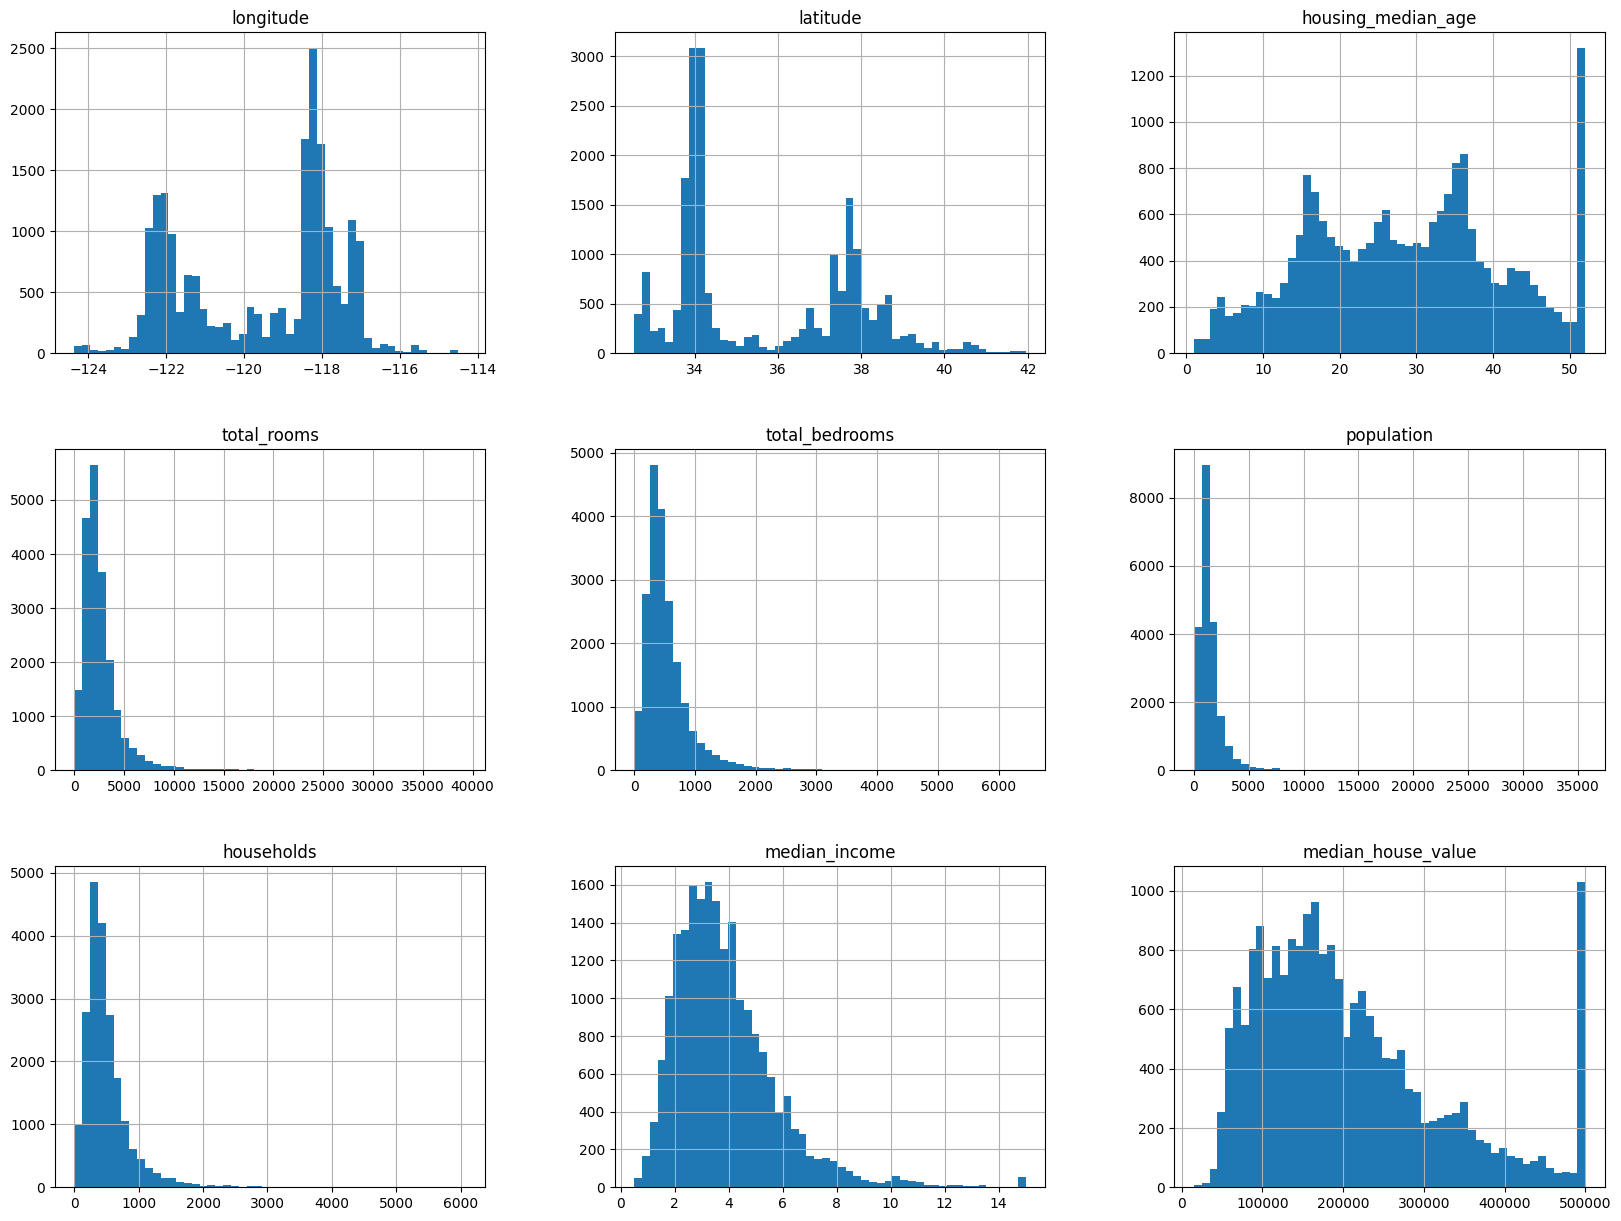

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.savefig('Histplot of Data')
plt.show()

Correlation analysis

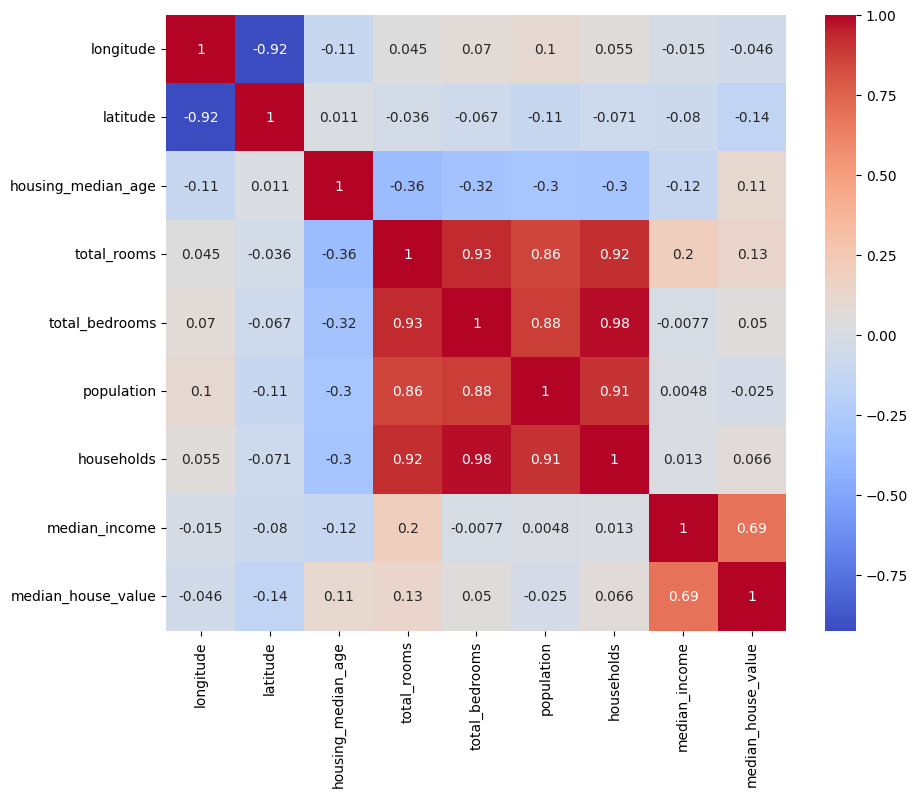

In [11]:
num_col = df.select_dtypes(include=['float64']).columns.tolist()

plt.figure(figsize=(10,8))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm')

plt.savefig('Data Correlation')
plt.show()



Scatter plots

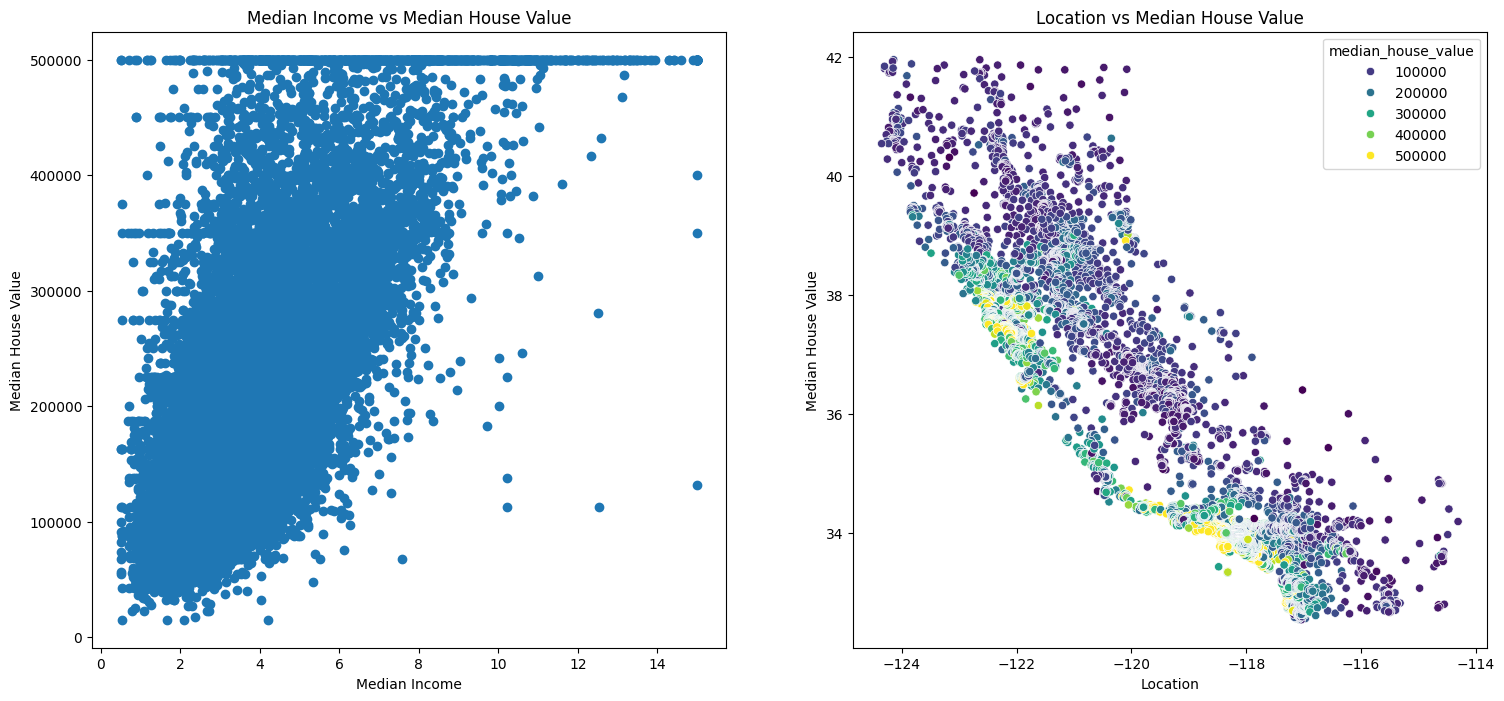

In [12]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)

plt.scatter(df['median_income'],df['median_house_value'])
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

plt.subplot(1,2,2)
sns.scatterplot(data=df,x='longitude',y='latitude',hue='median_house_value',palette='viridis')
plt.title('Location vs Median House Value')
plt.xlabel('Location')
plt.ylabel('Median House Value')

plt.show()


Boxplots

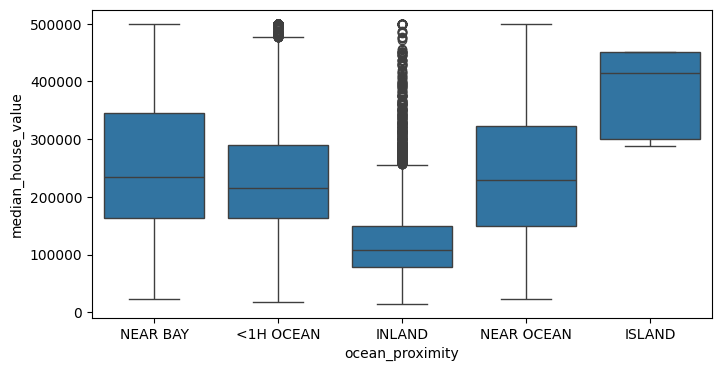

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df)
plt.show()

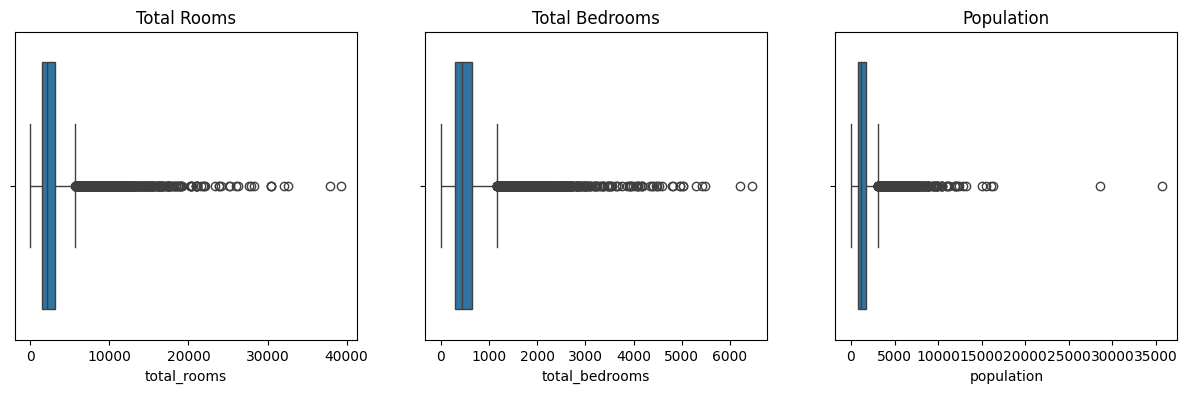

In [14]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x=df['total_rooms'])
plt.title('Total Rooms')

plt.subplot(1,3,2)
sns.boxplot(x=df['total_bedrooms'])
plt.title('Total Bedrooms')

plt.subplot(1,3,3)
sns.boxplot(x=df['population'])
plt.title('Population')

plt.show()

## 📊 Insights from EDA

- **Median Income** → strongest predictor of house value (clear positive correlation).  
- **Location (Longitude & Latitude)** → coastal areas show higher prices, inland areas lower.  
- **Ocean Proximity** → NEAR OCEAN & ISLAND homes are most expensive; INLAND homes cheapest.  
- **Housing Median Age** → capped at 50, weak correlation with price.  
- **Raw Totals (Rooms, Bedrooms, Population)** → weak predictors, but highly correlated with each other.  
- **Engineered Ratios** (rooms/household, bedrooms/room, population/household) → more useful than raw counts.  
- **Outliers** → extreme values in rooms, bedrooms, population; need capping or transformation.  
- **Target Variable** → median house value capped at $500k, affects regression models.


Handle Missing Values 

In [15]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='median')

df['total_bedrooms'] = impute.fit_transform(df[['total_bedrooms']])

Feature Engineering

In [16]:
# Average number of rooms per household → captures house size more meaningfully than raw totals
df['rooms_per_household'] = df['total_rooms'] / df['households']

# Ratio of bedrooms to rooms → indicates overcrowding or housing quality
df['bedrooms_per_rooms'] = df['total_bedrooms'] / df['total_rooms']

# Average population per household → shows household density, which affects demand and pricing
df['population_per_household'] = df['population'] / df['households']

In [17]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_rooms,population_per_household
15989,-122.47,37.76,39.0,3200.0,689.0,1391.0,618.0,3.6346,338000.0,NEAR BAY,5.177994,0.215312,2.250809
18507,-122.01,36.99,29.0,227.0,45.0,112.0,41.0,6.4469,271400.0,NEAR OCEAN,5.536585,0.198238,2.731707
12746,-121.37,38.63,32.0,3658.0,797.0,1452.0,715.0,2.6623,120700.0,INLAND,5.116084,0.217879,2.030769
17046,-122.26,37.48,34.0,4453.0,682.0,1805.0,672.0,5.6038,451300.0,NEAR OCEAN,6.626488,0.153155,2.686012
7220,-118.16,34.02,41.0,1256.0,391.0,1511.0,381.0,1.7981,166000.0,<1H OCEAN,3.296588,0.311306,3.965879


In [69]:
df['median_house_value'] = np.log1p(df['median_house_value'])

Spliting Data

In [70]:
X = df.drop(columns=['median_house_value'])
y = df['median_house_value']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [72]:
print('X Train Shape',X_train.shape)
print('X Test Shape',X_test.shape)

X Train Shape (16512, 12)
X Test Shape (4128, 12)


In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

Data Group

In [86]:
# Numeric and categorical columns
num_col = X_train.select_dtypes(include=['float64']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

# Skewed numeric features
skew_col = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

# Keep only non-skewed numeric features 
num_col = [col for col in num_col if col not in skew_col]

PipeLine

In [87]:
cat_pipeline = Pipeline(steps=[
    ('encoding',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

In [88]:
skew_pipeline = Pipeline(steps=[
    ('power',PowerTransformer())
])

In [89]:
num_pipeline = Pipeline(steps=[
    ('scaling',(StandardScaler()))
])

Preprocessor

In [90]:
preprocessor = ColumnTransformer(transformers=[
    ('cat',cat_pipeline,cat_col),
    ('skewed',skew_pipeline,skew_col),
    ('num',num_pipeline,num_col)
],remainder='passthrough')

Final PipeLine

In [91]:
model = Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('regressor',LinearRegression())
])

Train Model

In [92]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['ocean_proximity']),
                                                 ('skewed',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('num',
                                                  Pipeline(steps=[('scaling',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'rooms_per_household',
                                                   'bedrooms_per_rooms',
                                                   'population_per_household'])])),
                ('regressor', LinearRegression())])

In [93]:
y_pred = model.predict(X_test)

Evaluation

In [94]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [95]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.6221591178307717
MAE: 0.24276385696064035
RMSE: 0.35018929879679145


Cross Validation

In [96]:
from sklearn.model_selection import cross_validate

cv_score = cross_validate(model,X_train,y_train,cv=5,scoring='r2')

In [98]:
print('CV Mean R2: ', cv_score['test_score'].mean())

CV Mean R2:  0.7061923256415652


In [105]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

Parameter Grid

In [110]:
param_grid = {
    "regressor__n_estimators": [100, 200, 300, 500],
    "regressor__max_depth": [None, 10, 20, 30, 50],
    "regressor__min_samples_split": [2, 5, 10],
    "regressor__min_samples_leaf": [1, 2, 4, 10],
    "regressor__max_features": ["auto", "sqrt", "log2"],
    "regressor__bootstrap": [True, False]
}

Pipeline with Random Forest

In [111]:
rf_model = Pipeline(steps=[
    ('preprocessing',preprocessor),
    ('regressor',RandomForestRegressor(random_state=42))
])

In [112]:
random_search = RandomizedSearchCV(rf_model,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   cv=5,
                                   scoring='r2',
                                   random_state=42,
                                   n_jobs= -1)

In [ ]:
random_search.fit(X_train,y_train) 

In [114]:
random_search.best_params_

{'regressor__n_estimators': 500,
 'regressor__min_samples_split': 10,
 'regressor__min_samples_leaf': 2,
 'regressor__max_features': 'sqrt',
 'regressor__max_depth': 30,
 'regressor__bootstrap': False}

In [115]:
random_search.best_score_

0.8306535640537478

In [116]:
best_rf_model = random_search.best_estimator_
rf_y_pred = best_rf_model.predict(X_test)

In [117]:
print("Random Forest Test R²:", r2_score(y_test, rf_y_pred))

Random Forest Test R²: 0.831241006550463


In [118]:
# Predict on test set (log scale)
y_pred_log = random_search.best_estimator_.predict(X_test)

# Inverse transform back to dollars
y_pred_dollars = np.expm1(y_pred_log)
y_test_dollars = np.expm1(y_test)

# Calculate metrics in dollars
mae_dollars = mean_absolute_error(y_test_dollars, y_pred_dollars)
rmse_dollars = np.sqrt(mean_squared_error(y_test_dollars, y_pred_dollars))
r2_score_test = r2_score(y_test, y_pred_log)  # still use log scale for R²

print("Test R² (log scale):", r2_score_test)
print("MAE ($):", mae_dollars)
print("RMSE ($):", rmse_dollars)


Test R² (log scale): 0.831241006550463
MAE ($): 32588.52702032144
RMSE ($): 51215.5469559287
